In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pandas as pd

In [6]:
df = pd.read_csv("../../data/heart_clean.csv")

In [7]:
X = df.drop('target', axis=1)

In [8]:
y = df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_test_scaled = scaler.transform(X_test)

In [13]:
model = LogisticRegression(max_iter=1000)


In [14]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred = model.predict(X_test_scaled)

In [16]:
accuracy_score(y_test, y_pred)

0.8852459016393442

In [17]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.86      0.88        29\n           1       0.88      0.91      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.89      0.88      0.88        61\nweighted avg       0.89      0.89      0.89        61\n'

In [18]:
joblib.dump(model, "model.pkl")


['model.pkl']

In [19]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

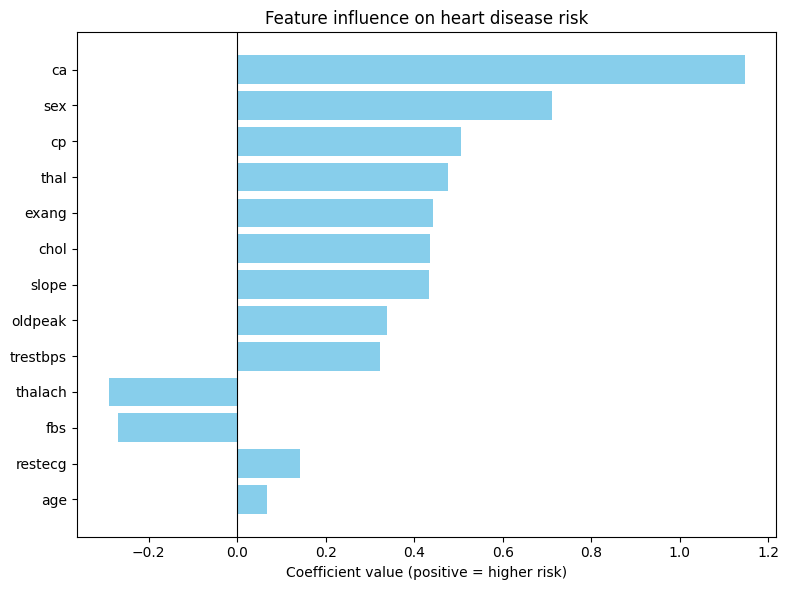

In [20]:
##VIEW THE FEATURE IMPORTANCE
import numpy as np
import matplotlib.pyplot as plt

# Get feature names and coefficients
features = X.columns
coefficients = model.coef_[0]

# Sort by absolute importance
importance = pd.DataFrame({
    'feature': features,
    'coefficient': coefficients,
    'abs_value': np.abs(coefficients)
}).sort_values(by='abs_value', ascending=True)

# Plot
plt.figure(figsize=(8,6))
plt.barh(importance['feature'], importance['coefficient'], color='skyblue')
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Feature influence on heart disease risk')
plt.xlabel('Coefficient value (positive = higher risk)')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

In [23]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [24]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [25]:
print("🌲 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


🌲 Random Forest Accuracy: 0.8524590163934426


In [26]:
print("\nReport:\n", classification_report(y_test, y_pred_rf))


Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [27]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf)
    ]
})

In [28]:
results

,Model,Accuracy
0,Logistic Regression,0.885246
1,Random Forest,0.852459


In [29]:
joblib.dump(model, "model_final.pkl")

['model_final.pkl']

In [30]:
joblib.dump(scaler, "scaler_final.pkl")

['scaler_final.pkl']